# **원클래쓰 - 빅데이터 분석 맛보기 (4기) -**

**목요일 강의 (4강)**

🧑👩 학생 여러분, 원클래쓰 강의에 오신걸 환영합니다 !\
짧은 시간이지만, 여러분들이 강의내용을 기반으로 스스로 학습할 수 있는 능력을 갖출 수 있도록 지원하는게 본 강의의 목적 입니다.

⛵ 이 강의를 "데이터 분석 세상 속으로의 긴 여정을 위한 첫 걸음"으로 이해해 주세요.

**나중을 위한 팁**\
✅ You can only learn data science by doing data science. (실제로 코드를 구현해 봐야 합니다 ~) \
✅ Practice, practice, practice. (연습하고 또 연습하세요, 이번 짧은 강의에서는 모든 세세한 내용을 전부 다룰수 없습니다 ~)\
✅ Free resources everywhere. (인터넷상에는 무료로 데이터 분석 또는 프로그래밍 관련 공부를 할 수 있는 많은 자료들이 존재 합니다. 마지막 날에 파이썬 관련 책 선물이 있을 겁니다 ~)

**여러분의 학습속도에 따라 스케줄의 변동가능성이 있을 예정**

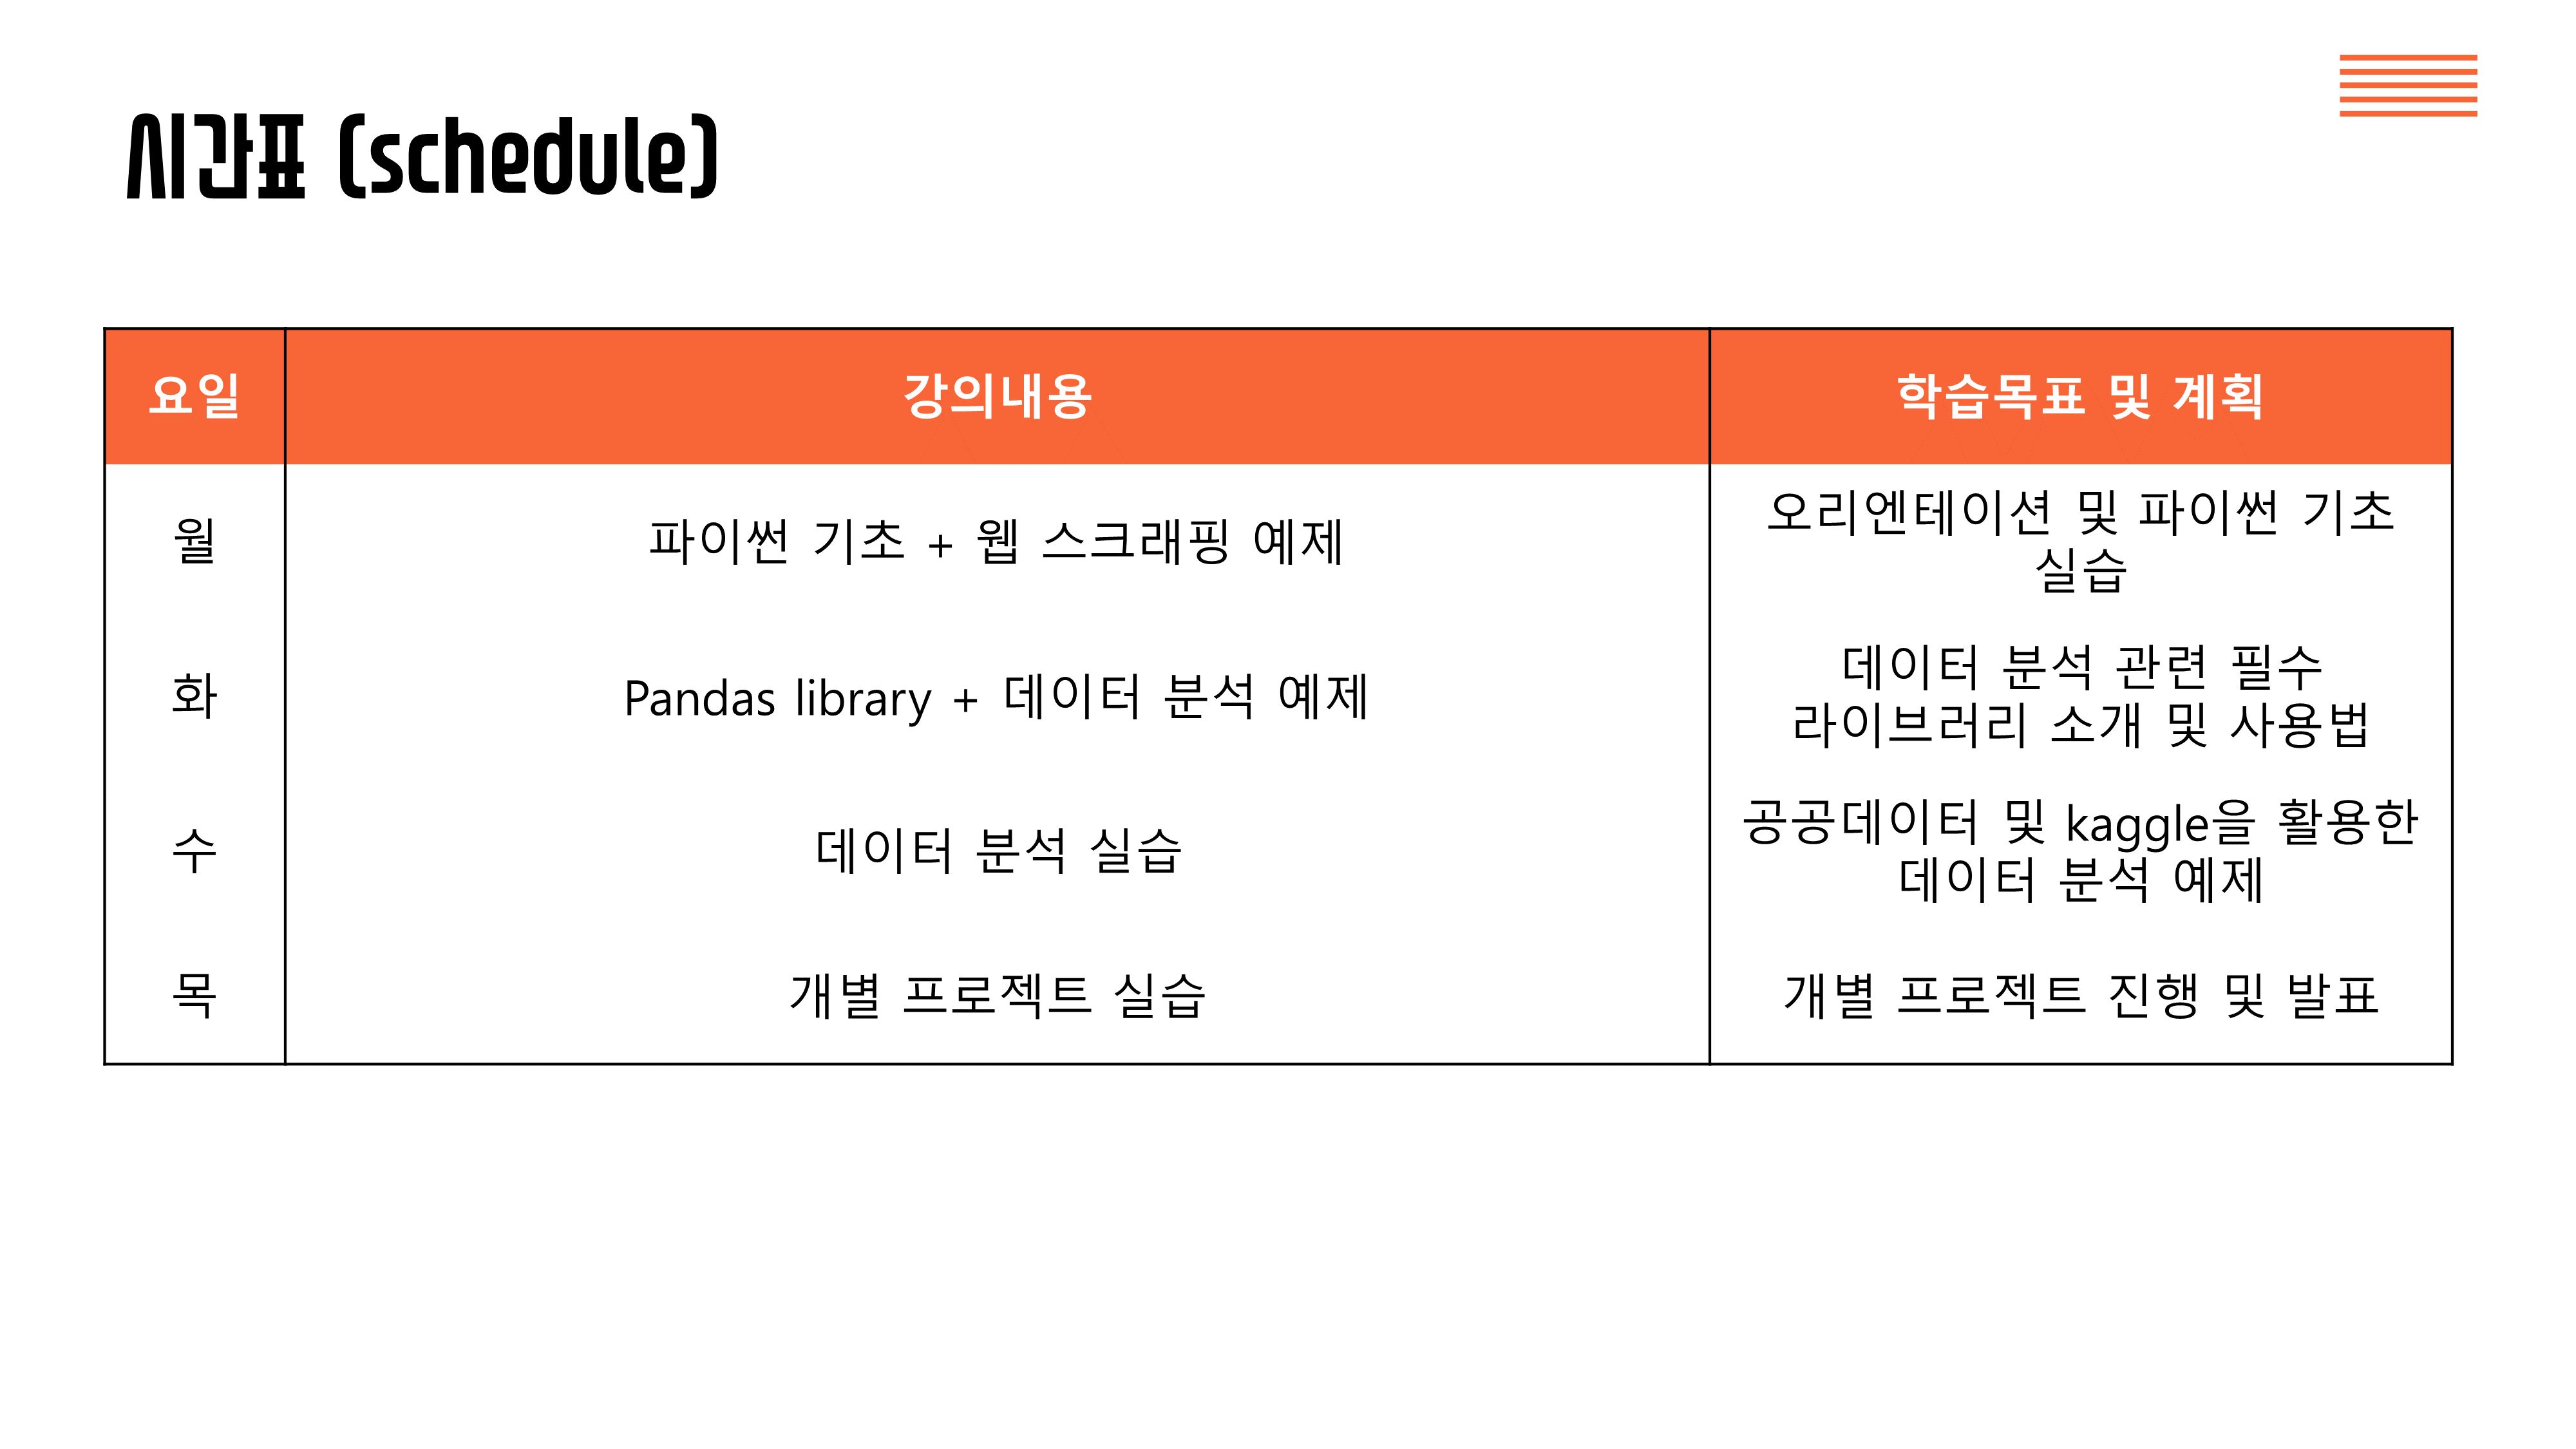

# **한국어 데이터를 사용하기 위한 준비작업**

시각화하는데 폰트가 깨져서 나오지 않게 하기 위한 사전작업.

In [ ]:
# "나눔폰트"를 인스톨
!apt -qq -y install fonts-nanum
%config InlineBackend.figure_format = 'retina' # 더 좋은 해상도 설정 (폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임)

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
print(nanum_font)

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

# **공공데이터 분석**

연구나 정책을 만드는데 유용한 데이터 제공 (원본 설문지 조사에 대한 데이터를 제공)

https://mdis.kostat.go.kr/index.do (마이크로데이터
통합서비스)

예) 경제활동인구조사

노동 > 경제활동인구조사 > 연간자료 (2019 그리고 2021) 비교해 보겠습니다.



https://www.mk.co.kr/news/economy/view/2021/07/691433/

## **필요한 라이브러리 로드**

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None) # 모든 데이터열(column)을 보여주게 하는 기능
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

## **데이터 불러오기 (2021년)**

In [ ]:
df2021 = pd.read_csv('/content/drive/MyDrive/one_class/경제활동인구조사 연간자료2 (2000~)_2021_20220120_00663.csv',encoding='cp949')

In [ ]:
df2021['numbers'] = 1

In [ ]:
df2021.shape

In [ ]:
df2021.head() # 직관적이지 않은 구조

In [ ]:
df2021.tail()

In [ ]:
df2021.info()

In [ ]:
# 조사년월 - 2021년만 추출
def extractor(x):
  y = str(x)
  return y[0:4]

df2021['year'] = df2021['조사년월'].apply(extractor)

In [ ]:
df2021.head()

In [ ]:
# 연령5세단위코드
df2021['연령5세단위코드'].unique()

In [ ]:
trans_dict = {1: "15~19세", 2: "20~24세", 3: "25~29세", 4:"30~34세", 5:"35~39세",
              6:"40~44세", 7: "45~49세", 8:"50~54세", 9:"55~59세",10:"60~64세",
              11:"65세이상"}

In [ ]:
df2021['연령5세단위코드'] = df2021['연령5세단위코드'].map(trans_dict)

In [ ]:
df2021.head()

In [ ]:
print(df2021['조사년월'].unique())
print(df2021['비경취업희망여부'].unique())
print(df2021['비경취업가능성여부'].unique())
print(df2021['기타활동사항_4주내비구직사유코드'].unique())
print(df2021['기타활동사항_지난1년내구직활동유무'].unique())
print(df2021['경제활동상태코드'].unique()) # 3의 뜻은 비경제활동인구

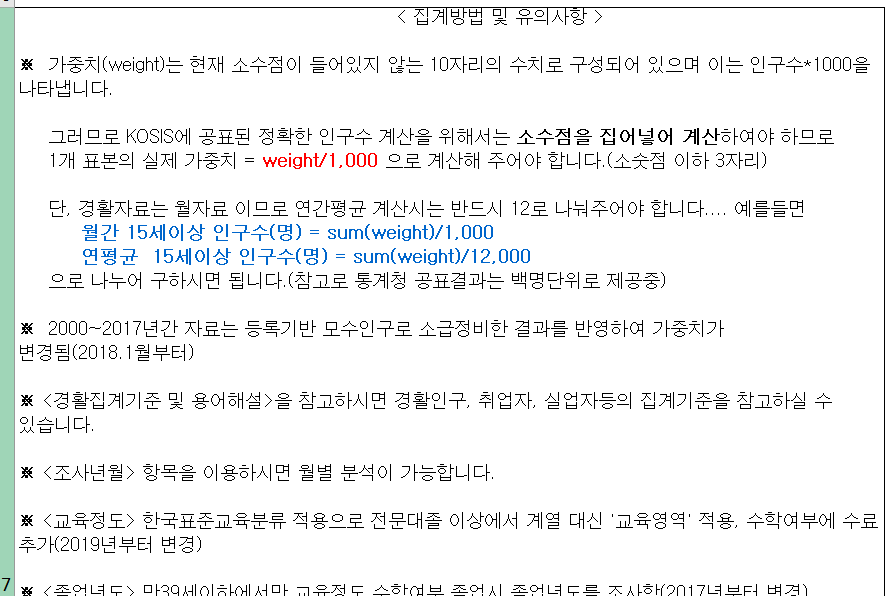

In [ ]:
df2021['구직단념자수'] = df2021['가중값'] / 12000 # 구직단념자 => "비경제활동인구"

In [ ]:
df2021.groupby(['연령5세단위코드'])['구직단념자수'].sum()

In [ ]:
df2021.groupby(['연령5세단위코드'])['가중값'].sum()/12000 # 원래 이런 의미

In [ ]:
df_age = (df2021.groupby(['연령5세단위코드'])['가중값'].sum()/12000).reset_index() # 원래 이런 의미
df_age = df_age.rename(columns= {"가중값":"구직단념자"})
df_age

In [ ]:
df_age['연령대'] = df_age['연령5세단위코드'].str[0] + "0대"

In [ ]:
df_age

In [ ]:
final_age = df_age.groupby(['연령대'])['구직단념자'].sum().reset_index()
final_age

In [ ]:
final_age.loc[5,'연령대'] = "60대 이상"

그림출처: https://www.yna.co.kr/view/GYH20210719000200044

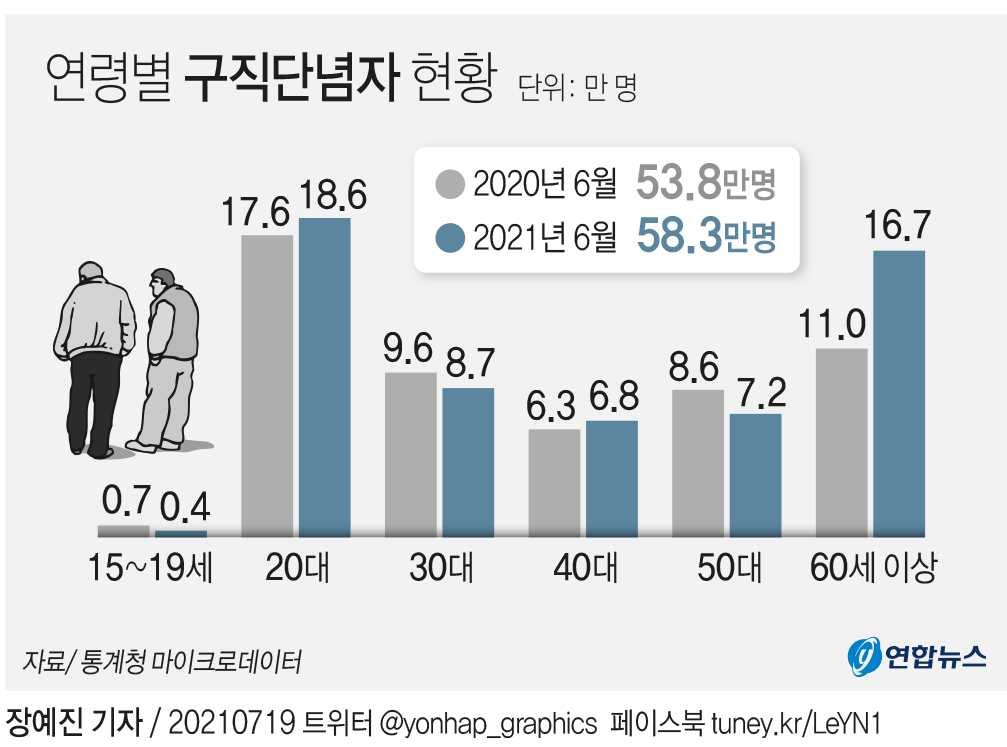

In [ ]:
final_age['구직단념자'] = final_age['구직단념자'].round() # # 소수점 제거
final_age 

In [ ]:
final_age['구직단념자'].sum()

In [ ]:
final_age

In [ ]:
df2021_06 = df2021.loc[df2021['조사년월'] == 202106].reset_index(drop=True)
df2021_06['조사년월'].unique()

In [ ]:
june = (df2021_06.groupby(['연령5세단위코드'])['가중값'].sum()/1000).reset_index() # 원래 이런 의미
june = june.rename(columns= {"가중값":"구직단념자"})
june

In [ ]:
june['연령대'] = june['연령5세단위코드'].str[0] + "0대"
june

In [ ]:
final_june = june.groupby(['연령대'])['구직단념자'].sum().reset_index()
final_june['구직단념자'] = final_june['구직단념자'].round()
final_june.loc[5,'연령대'] = "60대 이상"
final_june

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=final_june, x='연령대', y='구직단념자', palette='crest')
plt.xlabel("연령대", fontweight='bold',fontsize= 15, labelpad = 20)
plt.ylabel("인원수", fontweight='bold',fontsize= 15, labelpad = 20)

## **2019년 자료**

In [ ]:
df2019 = pd.read_csv('/content/drive/MyDrive/one_class/경제활동인구조사 연간자료2 (2000~)_2019_20220120_31816.csv',encoding='cp949')

In [ ]:
df2019.head() # 직관적이지 않은 구조

In [ ]:
df2019['연령5세단위코드'] = df2019['연령5세단위코드'].map(trans_dict)

In [ ]:
df2019_06 = df2019.loc[df2019['조사년월'] == 201906].reset_index(drop=True)
df2019_06['조사년월'].unique()

In [ ]:
june_2019 = (df2019_06.groupby(['연령5세단위코드'])['가중값'].sum()/1000).reset_index() # 원래 이런 의미
june_2019 = june_2019.rename(columns= {"가중값":"구직단념자"})
june_2019

In [ ]:
june_2019['연령대'] = june_2019['연령5세단위코드'].str[0] + "0대"
june_2019

In [ ]:
final_june_2019 = june_2019.groupby(['연령대'])['구직단념자'].sum().reset_index()
final_june_2019['구직단념자'] = final_june_2019['구직단념자'].round()
final_june_2019.loc[5,'연령대'] = "60대 이상"
final_june_2019

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=final_june_2019, x='연령대', y='구직단념자', palette='crest')
plt.xlabel("연령대", fontweight='bold',fontsize= 15, labelpad = 20)
plt.ylabel("인원수", fontweight='bold',fontsize= 15, labelpad = 20)

## **데이터프레임 2개 합치기**

In [ ]:
final_june # 2021

In [ ]:
final_june_2019 # 2022

In [ ]:
ultimate = pd.merge(final_june, final_june_2019, how='left',on=['연령대'], suffixes=('_2021', '_2019'))
ultimate

In [ ]:
df_melt = pd.melt(ultimate, id_vars="연령대", var_name="연도", value_name="구직단념자")
df_melt

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='연령대', y='구직단념자', hue='연도', data=df_melt, palette='mako') 
plt.xlabel("연령대", fontweight='bold',fontsize= 15, labelpad = 20)
plt.ylabel("인원수", fontweight='bold',fontsize= 15, labelpad = 20)

In [ ]:
# plt.figure(figsize=(12, 6))
# sns.factorplot("연도", "구직단념자", col="연령대", data=df_melt, kind="bar")
# plt.xlabel("연령대", fontweight='bold',fontsize= 15, labelpad = 20)
# plt.ylabel("인원수", fontweight='bold',fontsize= 15, labelpad = 20)

## **다른 컬럼 분석 (기타활동사항_4주내비구직사유코드)**

In [ ]:
df2021.head()

In [ ]:
df2021['기타활동사항_4주내비구직사유코드'].unique()

In [ ]:
trans_dict2 = {1: "전공이나 경력에 맞는 일거리가 없을것 같아서", 2: "원하는 임금수준이나 근로조건이 맞는 일거리가 없을것 같아서", 
               3: "근처에 일거리가 없을것 같아서", 4:"교육, 기술, 경험이 부족해서", 
               5:"나이가 너무 어리거나 많다고 고용주가 생각할것 같아서",
               6:"이전에 찾아보았지만 일거리가 없었기 때문에", 7: "육아", 8:"가사", 9:"통학",
               10:"심신장애",11:"기타()"}

In [ ]:
df2021['기타활동사항_4주내비구직사유코드'] = df2021['기타활동사항_4주내비구직사유코드'].map(trans_dict2)

In [ ]:
df2021.head(10)

In [ ]:
reasons = df2021.groupby(['기타활동사항_4주내비구직사유코드'])['numbers'].count().reset_index()
reasons = reasons.sort_values("numbers", ascending=False)
reasons

# **선형회귀 모델**

이론 설명은 생략, 실제 코드 구현 위주로 보도록 하겠습니다.

* 목표: 선형회귀 모델 구축
* 예측의 의미: 데이터(X)/설명변수를 입력받아 새로운 값(Y)/(미래의)종속변수를 예측하고 평가하기
* 설명변수: 에측값을 설명할 수 있는 변수
* 종속변수: 예측하고자 하는 값

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy as sp
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson

In [ ]:
boston = datasets.load_boston()

## **변수에 대한 설명**

In [ ]:
print(boston.DESCR)

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['HousePrice'] = boston.target

In [ ]:
df.shape # 13개의 설명변수, 1개의 종속변수

In [ ]:
df.head()

주택가격(house price)를 예측하려고 한다.
나머지 컬럼들은, 주택가격에 영향을 미칠만한 요소들이라고 판단해서, 모델을 계산하는데 사용한다.

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [ ]:
for i in range(0, len(df.columns), 4):
    sns.pairplot(data=df,x_vars=df.columns[i:i+4],y_vars=['HousePrice'])

In [ ]:
sns.regplot(data=df, x="RM", y="HousePrice") # RM은 방의 개수를 의미

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu', fmt=".2f")

In [ ]:
y = pd.DataFrame(df['HousePrice'])
y

## **변수선택**

In [ ]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO',  'LSTAT']] # 'B'를 제거 하고 예측
X

In [ ]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022)
# random state가 없다면, 매번 실행할때 마다 다른 train 및 test 데이터 셋이 생성

OLS를 사용해서 선형회귀 모델 구축 (다중선형회귀)

OLS: 잔차제곱합을 최소화하는 가중치를 구하는 방법

## **모델 만들기 (I)**

In [ ]:
X_train = sm.add_constant(X_train) # beta_zero is added 
model = sm.OLS(y_train, X_train, axis=1) # 모델 선언

In [ ]:
model_trained = model.fit() # 모델 학습

**선형회귀 모델 가정이 성립하는지 확인**

In [ ]:
#1 : The residuals of the model are normally distributed
model_residuals = model_trained.resid
# 확률오차의 정규성을 확인
plt.rcParams['axes.unicode_minus'] = False
f, ax = plt.subplots(figsize = (12,8))
sm.ProbPlot(model_residuals).qqplot(line='s', color ='#1f77b4', ax=ax)
plt.title('QQ Plot')

# 데이터가 빨간색 실선을 잘 따라가면, Ok !

In [ ]:
#2: The variance of residual is the same for any value of X. 
# 등분산성을 확인
# 등분산성: 서로 다른 집단간의 분산이 같은지를 확인
model_fitted_y = model_trained.fittedvalues
f, ax = plt.subplots(figsize = (12,8))
sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha':0.5},line_kws={'color':'red'},ax=ax)
plt.title('Residual vs. Fitted', fontsize = 30,pad=25)
plt.xlabel("Fitted values", fontweight='bold',fontsize= 20, labelpad = 25)
plt.ylabel("Residuals", fontweight='bold',fontsize= 20, labelpad = 25)

더빗 왓슨 테스트는 회귀분석 후 잔차의 독립성을 확인하는데 사용하는 테스트.
잔차끼리 자기상관성이 있는지를 확인.

In [ ]:
# 3. Perform Durbin-Watson test for testing the independence of residuals
# No correlation between the residuals.
durbin_watson(model_trained.resid)
print("The test statistic is ",+ round(durbin_watson(model_trained.resid) ,3))
# Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

* 결정계수 (R2) :  결정계수의 값이 1(100%)에 가까울수록 모형이 자료를 잘 설명하고 있다고 말한다.
* coefficient: X가 1단위 증가할때, y의 변화량.
* p-value: 0.05 아래여야 유의미함.


In [ ]:
print(model_trained.summary())

INDUS와 AGE의 경우 p-value 값이 0.05이상. 상당히 높다. 제거해서 새로운 모델 생성.

In [ ]:
model = sm.OLS(y_train, X_train.drop(['INDUS','AGE'], axis=1))
model_trained2 = model.fit()
print(model_trained2.summary())

**실제 예측**

In [ ]:
y_trained_pred = model_trained2.fittedvalues

f, ax = plt.subplots(figsize = (12,8))
plt.title("Actual values vs. Predicted values", size=30)
plt.scatter(y_train,y_trained_pred)
plt.plot([-5,55],[-5,55],ls='--',c='red')
plt.xlabel("Actual values", fontsize= 20)
plt.ylabel("Predicted values from model", fontsize= 20)
plt.xlim(-5,55)
plt.ylim(-5,55)
plt.show()

In [ ]:
X_test = sm.add_constant(X_test) # beta_zero is added 
y_test_pred2 = model_trained2.predict(X_test.drop(['INDUS','AGE'],axis=1))
y_test_pred2.head()

In [ ]:
# MSE = mean squared error (평균제곱오차)  # 실제 값과 예측값의 차이를 제곱해 평균한 것
print(mean_squared_error(y_test,y_test_pred2))

In [ ]:
# RMSE = root mean squared error (제곱근 평균제곱오차) # 루트를 씌우면 보다 직관적으로 오차의 수치 비교가 가능
print(np.sqrt(mean_squared_error(y_test,y_test_pred2)))

In [ ]:
# R squared는 예측 모형이 얼마나 실제 데이터와 유사하냐를 0 ~ 1사이의 값으로 나타내는 지표
print(r2_score(y_test,y_test_pred2)) 

## **모델 만들기 (II)**

**더 유명하고 간편한(?) 라이브러리**

In [ ]:
linear_model = LinearRegression() # fit_intercept=False
linear_model.fit(X_train.drop(['INDUS','AGE'], axis=1),y_train)

In [ ]:
# X_test를 이용한 예측 값 생성
y_pred_sklearn = linear_model.predict(X_test.drop(['INDUS','AGE'], axis=1))

위의 statsmodel로 계산한 값과 같은 결과를 얻을 수 있다.

In [ ]:
test_mse_skl = mean_squared_error(y_test,y_pred_sklearn)
print("Testing MSE: {:.3f}".format(test_mse_skl))

In [ ]:
test_rmse_skl = np.sqrt(mean_squared_error(y_test,y_pred_sklearn))
print("Testing RMSE: {:.3f}".format(test_rmse_skl))

In [ ]:
test_r2_skl = r2_score(y_test,y_pred_sklearn)
print("Testing R2: {:.3f}".format(test_r2_skl))

## **절편과 회귀계수**

In [ ]:
print('intercept(절편) :',linear_model.intercept_)
print('coef(회귀계수) : ',np.round(linear_model.coef_, 1))

In [ ]:
(np.round(linear_model.coef_, 1))[0][0]

In [ ]:
X_removed = X.drop(['INDUS','AGE'], axis=1)
X_removed

In [ ]:
# 회귀계수를 데이터프레임으로 변환
coeff = pd.Series(data = np.round(linear_model.coef_,2)[0], index = X_removed.columns)
coeff

# **여러분의 프로젝트**

In [ ]:
# 코드셀과 텍스트셀 모두 이용해서 기록해 보세요